이상치 탐지 및 처리

<div style="text-align: right"> 최준혁 </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [11]:
dates = pd.date_range(start="2023-01-01", periods=100, freq='D')
values = np.random.randn(100)*10
values[30] = 81

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})


In [12]:
z_scores = np.abs(stats.zscore(data['Value']))

threshold = 3

outliers = z_scores > threshold

data.loc[outliers, 'Value'] = np.nan #이상치 결측치로 처리

data['Value'] = data['Value'].interpolate()

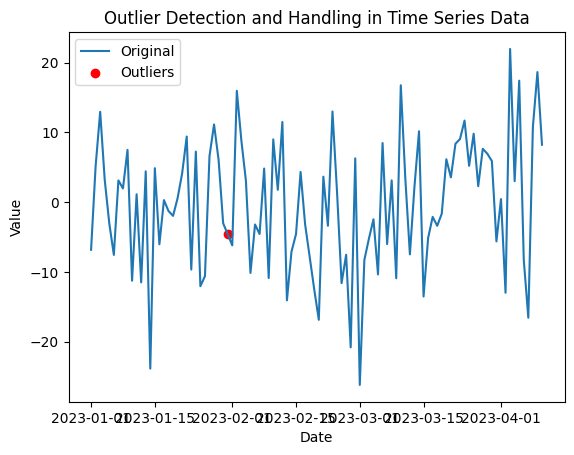

이상치 처리된 데이터 확인 >>  -4.619565675426477


In [13]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

 

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[30])

시계열 데이터 활용 min-max 정규화 적용

In [8]:
values = np.random.randint(0, 100, size=100)

data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

min_v = data['Value'].min()
max_v = data['Value'].max()

data['Value_Normalized'] = (data['Value'] - min_v) / (max_v - min_v)


print(data[['Date', 'Value_Normalized']])

         Date  Value_Normalized
0  2023-01-01          0.329897
1  2023-01-02          0.134021
2  2023-01-03          0.103093
3  2023-01-04          0.969072
4  2023-01-05          0.680412
..        ...               ...
95 2023-04-06          0.783505
96 2023-04-07          0.969072
97 2023-04-08          0.371134
98 2023-04-09          0.041237
99 2023-04-10          0.505155

[100 rows x 2 columns]
